<a class="anchor" id="0.1"></a>
# Airline Analysis
- [1. Univariate Analysis](#1)

- [2. Bivariate Analysis](#2)

- [3. Multivariate Analysis](#3)

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

## Read in Data
df = pd.read_csv("flight.csv")
df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


## 1. Univariate Analysis <a class="anchor" id="1"></a>
[Table of Contents](#0.1)


1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

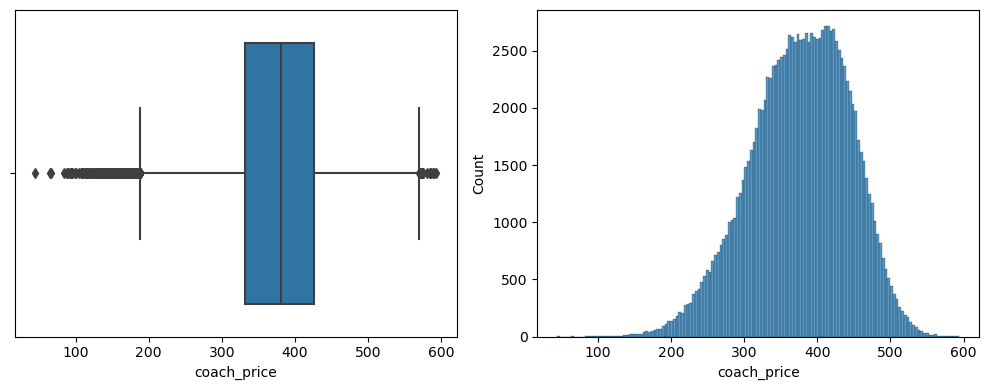

In [2]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df["coach_price"])

plt.subplot(1,2,2)
sns.histplot(df["coach_price"])
plt.tight_layout()

In [3]:
df["coach_price"].describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

In [4]:
# $500 doesn't seem like a good price for a coach ticket Because mean price = 376 and max price = 593.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

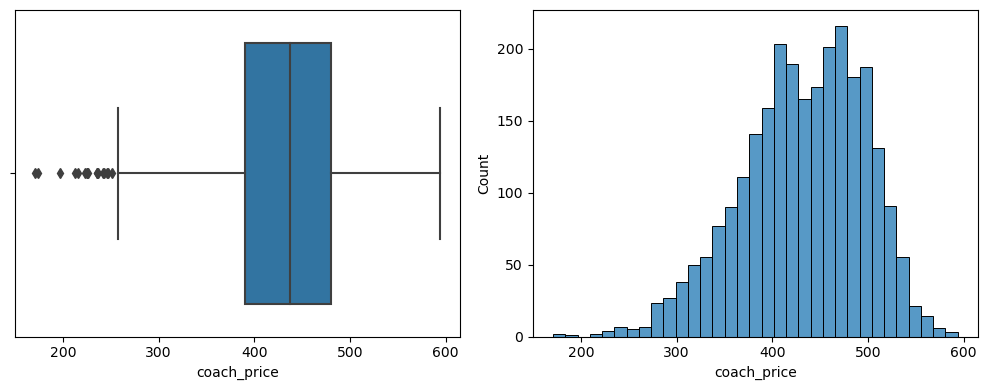

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df.loc[df["hours"] == 8, "coach_price"])

plt.subplot(1,2,2)
sns.histplot(df.loc[df["hours"] == 8, "coach_price"])
plt.tight_layout()

In [6]:
df.loc[df["hours"] == 8, "coach_price"].describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

In [7]:
# $500 dollar ticket seem more reasonable than before. The mean price is $431.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [8]:
df["delay"].describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

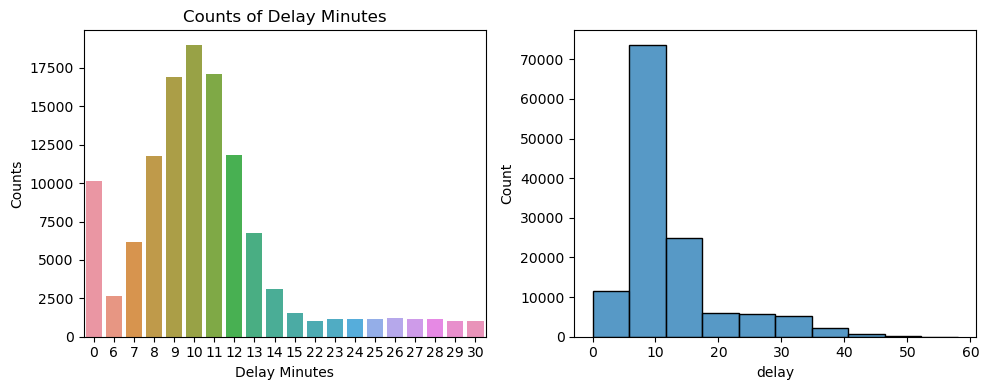

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x = df["delay"].value_counts(ascending = False)[:20].index, 
            y = df["delay"].value_counts(ascending = False)[:20].values)

plt.title("Counts of Delay Minutes")
plt.xlabel("Delay Minutes")
plt.ylabel("Counts")

plt.subplot(1, 2, 2)
sns.histplot(df[df["delay"] < 100]["delay"], bins = 10)

plt.tight_layout()

In [10]:
# 8, 9, 10, 11 minutes of delays are typical.

## 2. Bivariate Analysis <a class="anchor" id="2"></a>
[Table of Contents](#0.1)


4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

Text(0.5, 1.0, 'Coach Price vs FirstClass Price')

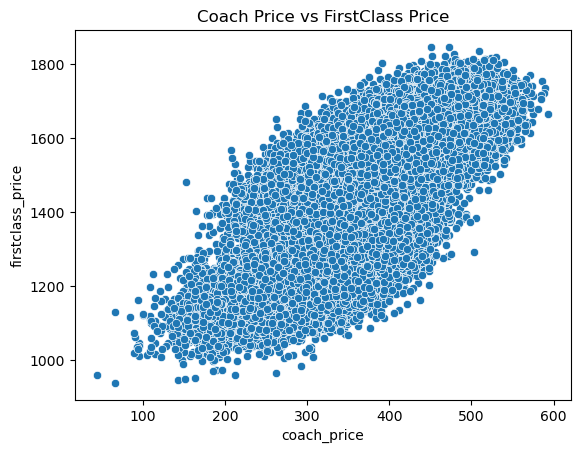

In [43]:
sns.scatterplot(data = df, x = "coach_price", y = "firstclass_price")
plt.title("Coach Price vs FirstClass Price")

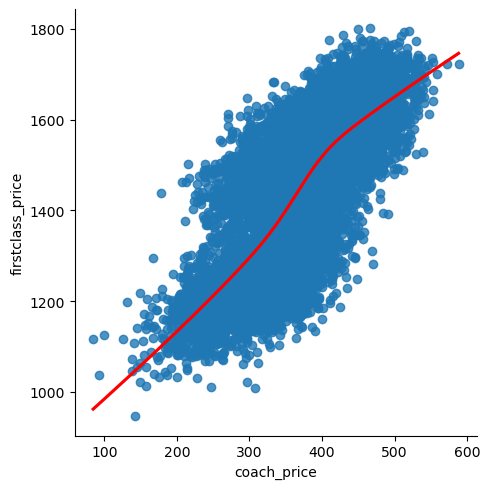

In [45]:
perc = 0.1
df_sub = df.sample(n = int(df.shape[0] * perc))
sns.lmplot(data = df_sub, x = "coach_price", y = "firstclass_price", line_kws = {"color" : "red"}, lowess = True);

In [12]:
# Flights with higher coach prices always have higher first-class prices.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

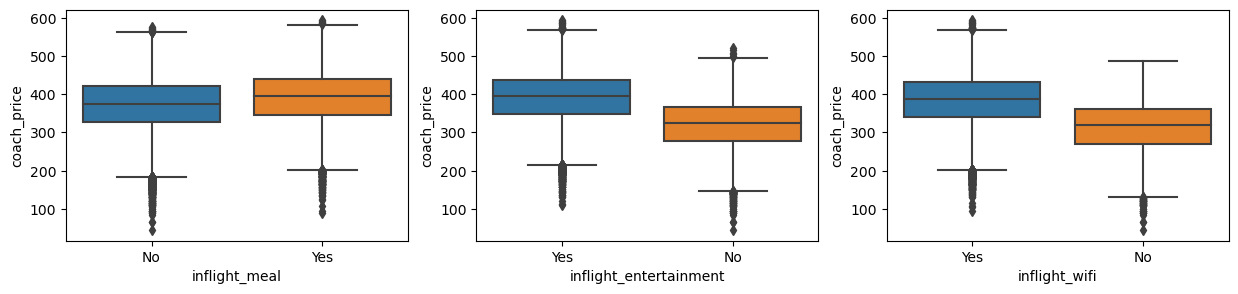

In [13]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
sns.boxplot(data = df, x = "inflight_meal", y = "coach_price")

plt.subplot(1,3,2)
sns.boxplot(data = df, x = "inflight_entertainment", y = "coach_price")

plt.subplot(1,3,3)
sns.boxplot(data = df, x = "inflight_wifi", y = "coach_price")

plt.show()

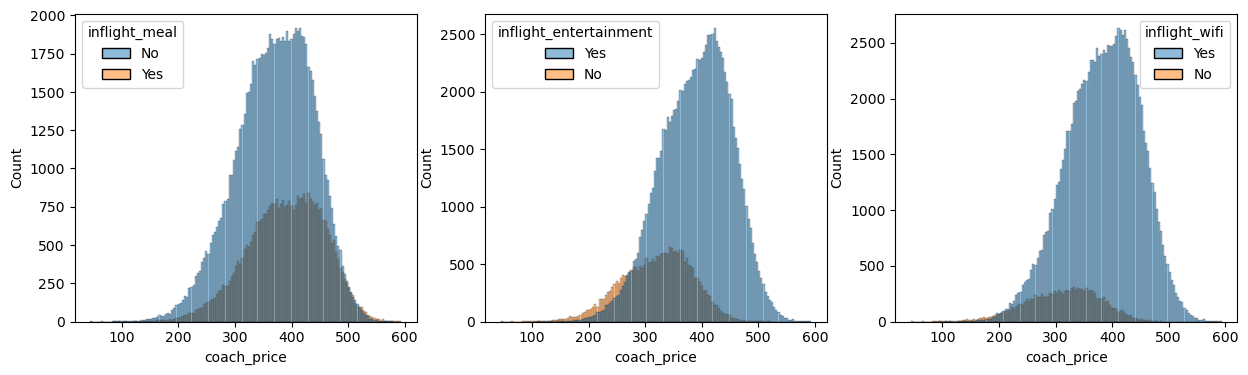

In [48]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(data = df, x = "coach_price", hue ="inflight_meal")

plt.subplot(1,3,2)
sns.histplot(data = df, x = "coach_price", hue ="inflight_entertainment")

plt.subplot(1,3,3)
sns.histplot(data = df, x = "coach_price", hue ="inflight_wifi");

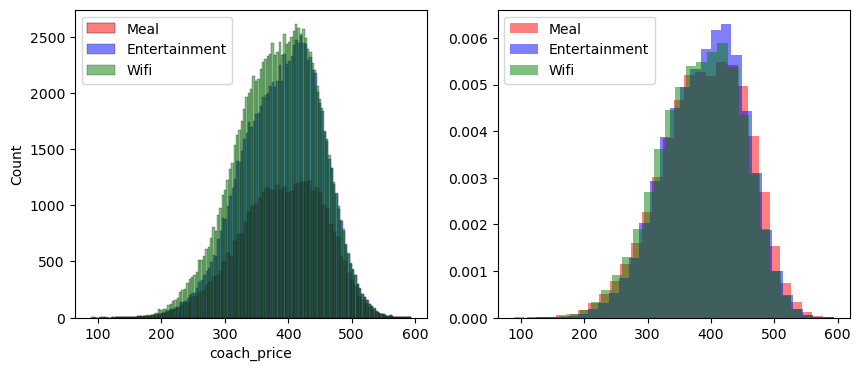

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(data = df[df["inflight_meal"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="red", label ="Meal")

sns.histplot(data = df[df["inflight_entertainment"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="blue", label = "Entertainment")

sns.histplot(data = df[df["inflight_wifi"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="green", label = "Wifi")

plt.legend()

plt.subplot(1,2,2)
plt.hist(df[df["inflight_meal"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="red", label ="Meal", density=True, bins=30)

plt.hist(df[df["inflight_entertainment"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="blue", label = "Entertainment", density = True, bins = 30)

plt.hist(df[df["inflight_wifi"] == "Yes"]["coach_price"], 
             alpha = 0.5, color="green", label = "Wifi", density = True, bins = 30)

plt.legend();


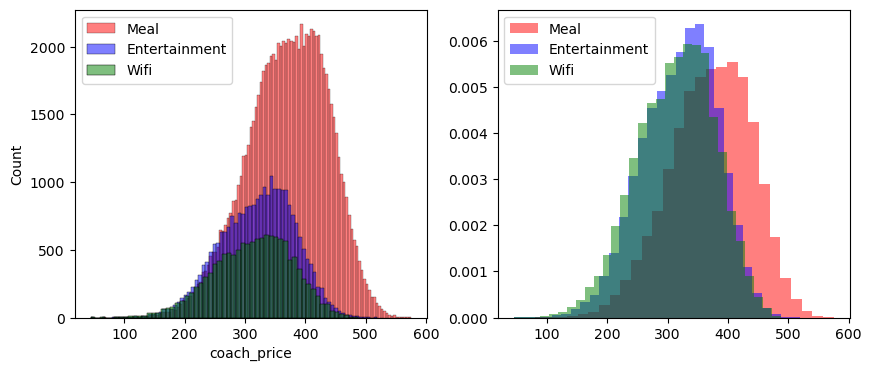

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(data = df[df["inflight_meal"] == "No"]["coach_price"], 
             alpha = 0.5, color="red", label ="Meal")

sns.histplot(data = df[df["inflight_entertainment"] == "No"]["coach_price"], 
             alpha = 0.5, color="blue", label = "Entertainment")

sns.histplot(data = df[df["inflight_wifi"] == "No"]["coach_price"], 
             alpha = 0.5, color="green", label = "Wifi")

plt.legend()

plt.subplot(1,2,2)
plt.hist(df[df["inflight_meal"] == "No"]["coach_price"], 
             alpha = 0.5, color="red", label ="Meal", density=True, bins=30)

plt.hist(df[df["inflight_entertainment"] == "No"]["coach_price"], 
             alpha = 0.5, color="blue", label = "Entertainment", density = True, bins = 30)

plt.hist(df[df["inflight_wifi"] == "No"]["coach_price"], 
             alpha = 0.5, color="green", label = "Wifi", density = True, bins = 30)

plt.legend();


In [16]:
 # inflight_entertainmet and inflight_wifi features are associated with the highest increase in price.

6. How does the number of passengers change in relation to the length of flights?

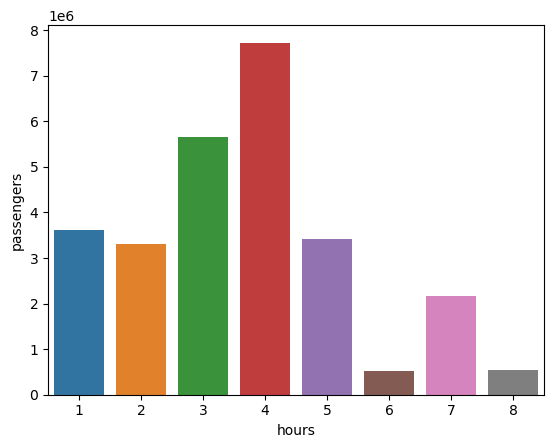

In [51]:
sns.barplot(data = df.groupby("hours")["passengers"].sum().reset_index(), x = "hours", y = "passengers");

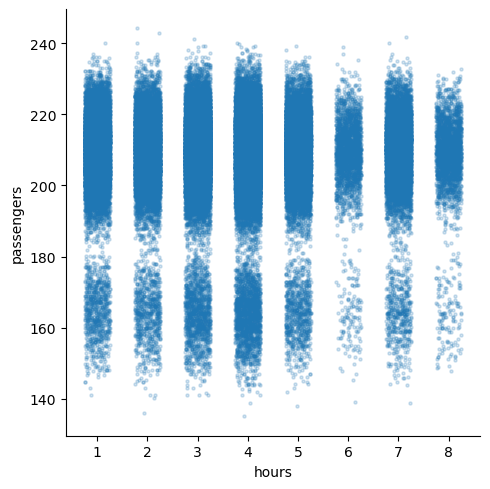

In [57]:
sns.lmplot(data = df, x = "hours", y = "passengers", 
           fit_reg = False, x_jitter = 0.25, y_jitter = 0.25,
           scatter_kws={"s" : 5, "alpha" : 0.2});

In [ ]:
# After the flight time exceeds 4 hours, the number of passengers decreases.

## 3. Multivariate Analysis <a class="anchor" id="3"></a>
[Table of Contents](#0.1)


7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

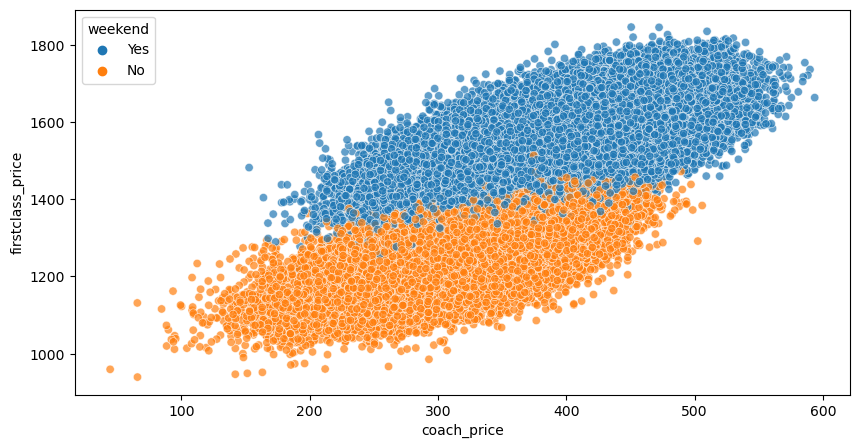

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "coach_price", y = "firstclass_price", hue = "weekend", alpha=0.7);

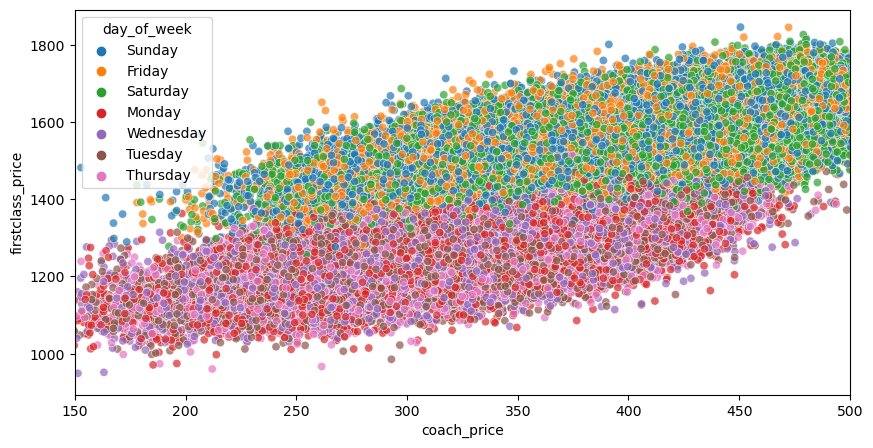

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "coach_price", y = "firstclass_price", hue = "day_of_week", alpha=0.7)
plt.xlim([150, 500]);

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

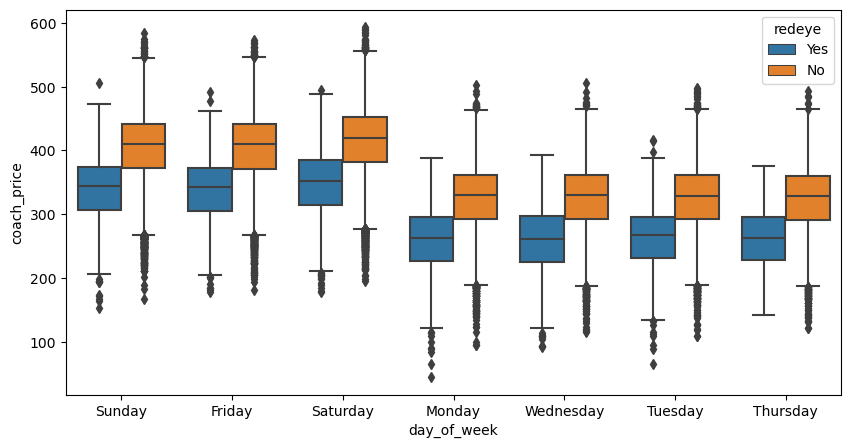

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = "day_of_week", y = "coach_price", hue = "redeye");

In [38]:
# For each day of the week, we can say that the coach price in the redeyes no status is higher than the redeyes yes status.

---